# Chapter 3

The assumptions required for this model to work (Gauss-Markov assumptions)

* Linear in parameters: The model can be written as $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + u$
* Random sampling: We have a random sample of $n$ observations following the population model above
* No perfect collinearity: In the sample none of the independent variables is constand and there is no exact linear relationship between the independent variables.
* Zero conditional mean: The error $u$ has an expected value of zero given any values of hte independent variables. $E(u|x_1,x_2,...,x_k) = 0$
* Homoskedasticity: The error $u$ has the same variance given any value of the explanatory variables. $Var(u|x_1,...,x_k) = \sigma^2$

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
#Exercise C1
bwght = pd.read_stata("stata/bwght.dta")

y = bwght.bwght
X = sm.add_constant(bwght.cigs)

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     32.24
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.66e-08
Time:                        13:25:42   Log-Likelihood:                -6135.5
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1386   BIC:                         1.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.7719      0.572    209.267      0.0

In [3]:
y = bwght.bwght
X = bwght[["cigs", "faminc"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           7.94e-10
Time:                        13:25:42   Log-Likelihood:                -6130.4
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1385   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.9741      1.049    111.512      0.0

C1.i The most likely sign for the family income coefficient is positive

C1.ii There are arguments in both directions. Higher income allows for more purchases, but higher income may also indicate higher education or other features that make someone less likely to smoke. If forced, I would believe that family income is negatively correlated

C1.iii cigs becomes smaller with the addition of faminc (both the point estimate and teh confidence interval is higher) by about 0.05 (which is a 10% change). The broad strokes may be the same but it is likely better to include faminc.

In [4]:
bwght.cigs.corr(bwght.bwght)

-0.15076180254312696

In [5]:
#Exercise C2
hprice1 = pd.read_stata("stata/hprice1.dta")

y = hprice1.price
X = sm.add_constant(hprice1[["sqrft", "bdrms"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.57e-19
Time:                        13:25:42   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3150     31.047     -0.622      0.5

In [6]:
(model.params[1] * 140) + (model.params[2] * 1)

33.179260419382935

C2.i $price = -19.3150 + 0.1284 sqrft + 15.1982 bdrms$ 

n = 88, r-squared = .632

C2.ii 15.1982 (per bedroom) which translates to \$15,198.20

C2.iii The price is now changing in two terms, both positive with a value of \$33,179.26. This is much larger than in part ii

C2.iv 63% of the variation is explained by these two variables

C2.v \\$354,605.25

C2.vi The residual is \\$54,605.25, suggesting the buyer underpaid for the house

In [7]:
#Exercise C3
ceosal2 = pd.read_stata("stata/ceosal2.dta")

y = ceosal2.lsalary
X = sm.add_constant(ceosal2[["lsales", "lmktval"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.73e-14
Time:                        13:25:42   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6209      0.254     18.163      0.0

In [8]:
y = ceosal2.lsalary
X = sm.add_constant(ceosal2[["lsales", "lmktval", "profits"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     24.64
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.53e-13
Time:                        13:25:42   Log-Likelihood:                -130.53
No. Observations:                 177   AIC:                             269.1
Df Residuals:                     173   BIC:                             281.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6869      0.380     12.343      0.0

In [9]:
y = ceosal2.lsalary
X = sm.add_constant(ceosal2[["lsales", "lmktval", "profits", "ceoten"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     20.08
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.39e-13
Time:                        13:25:42   Log-Likelihood:                -128.10
No. Observations:                 177   AIC:                             266.2
Df Residuals:                     172   BIC:                             282.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5578      0.380     11.986      0.0

In [10]:
ceosal2.lmktval.corr(ceosal2.profits)

0.7768975920312077

C3.i $log(salary) = 4.6209 + 0.1621 log(sales) + 0.1067 log(mktval)$

n = 177, r-squared = 0.299

C3.ii The variable cannot be added since profits can be 0 or negative. These variables only explain about 30% of CEO salary and the coefficient on profits is very small.

C3.iii Another year of CEO tenure adds 1.2% to salary

C3.iv The correlation coefficient is 0.7769 we would expect the variance of profits and log market value to be higher, but the standard errors in both regressions seem to be rather small.

In [11]:
#Exercise C3
attend = pd.read_stata("stata/attend.dta")

print(attend[["atndrte", "priGPA", "ACT"]].min())
print(attend[["atndrte", "priGPA", "ACT"]].max())
print(attend[["atndrte", "priGPA", "ACT"]].mean())

atndrte     6.250
priGPA      0.857
ACT        13.000
dtype: float32
atndrte    100.00
priGPA       3.93
ACT         32.00
dtype: float32
atndrte    81.709557
priGPA      2.586776
ACT        22.510294
dtype: float32


In [12]:
y = attend.atndrte
X = sm.add_constant(attend[["priGPA", "ACT"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.39e-51
Time:                        13:25:42   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7004      3.884     19.490      0.0

In [13]:
X_p = pd.DataFrame({"const" : [1.0, 1.0, 1.0], "priGPA" : [3.65, 3.1, 2.1], "ACT": [20, 21, 26]})
print(model.predict(exog=X_p))

0    104.370504
1     93.160625
2     67.317270
dtype: float64


C4.i MIN: atndrte 6.250, priGPA 0.857, ACT 13.000; MAX: atndrte 100, priGPA 3.93, ACT 32.00; MEAN: atndrte 81.71, priGPA 2.59, ACT 22.51

C4.ii The 'base' attendance of students prior to grades is 75%

C4.iii It is surprising ACT has a negative association with attendance

C4.iv ACT is lower than a realized value meaning predicted attendance is greater than 100%

C4.v The gap is wider than expected because of the negative coefficient for ACT. The predicted difference is about 25.

In [14]:
#Exercise C5
wage1 = pd.read_stata("stata/wage1.dta")

y = wage1.educ
X = sm.add_constant(wage1[["exper", "tenure"]])
model = sm.OLS(y, X).fit()
resid = model.resid
model_summary = model.summary()
print(model_summary)

y = wage1.lwage
X = sm.add_constant(resid)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     29.49
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           7.33e-13
Time:                        13:25:42   Log-Likelihood:                -1253.5
No. Observations:                 526   AIC:                             2513.
Df Residuals:                     523   BIC:                             2526.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5750      0.184     73.647      0.0

In [15]:
#Exercise C6
wage2 = pd.read_stata("stata/wage2.dta")

y = wage2.IQ
X = sm.add_constant(wage2.educ)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     338.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.16e-64
Time:                        13:25:42   Log-Likelihood:                -3717.0
No. Observations:                 935   AIC:                             7438.
Df Residuals:                     933   BIC:                             7448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.6872      2.623     20.468      0.0

In [16]:
y = wage2.lwage
X = sm.add_constant(wage2.educ)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.42e-22
Time:                        13:25:42   Log-Likelihood:                -469.72
No. Observations:                 935   AIC:                             943.4
Df Residuals:                     933   BIC:                             953.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9731      0.081     73.403      0.0

In [17]:
y = wage2.lwage
X = sm.add_constant(wage2[["educ", "IQ"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     69.42
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           7.88e-29
Time:                        13:25:42   Log-Likelihood:                -452.72
No. Observations:                 935   AIC:                             911.4
Df Residuals:                     932   BIC:                             926.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6583      0.096     58.793      0.0

In [18]:
0.0391 + (0.0059 * 3.5338)

0.05994942

C6.i-iv Results are reported above. Final value is not identical but very close

In [19]:
#Exercise C7
meap93 = pd.read_stata("stata/meap93.dta")

y = meap93.math10
X = sm.add_constant(meap93[["lexpend", "lnchprg"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     44.43
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.59e-18
Time:                        13:25:42   Log-Likelihood:                -1497.1
No. Observations:                 408   AIC:                             3000.
Df Residuals:                     405   BIC:                             3012.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.3607     25.073     -0.812      0.4

In [20]:
y = meap93.math10
X = sm.add_constant(meap93.lexpend)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           0.000475
Time:                        13:25:42   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.3411     26.530     -2.614      0.0

In [21]:
meap93.lexpend.corr(meap93.lnchprg)

-0.1927042115497247

C7.i A negative sign for the lunch program is unexpected, since this would be expected to be positive or at least irrelevant unless it's considered a proxy for poverty

C7.ii The intercept reflects the fact that there will be some base level (that is, both values won't be 0). Even with the log, it does not make sense to set both to 0 since it will still produce a negative score

C7.iii Estimated effect of expenditure is now larger

C7.iv There is a negative correlation between log expenditure and a lunch program. This could make sense in that some spending is diverted to the lunch program or that lunch programs are found in less affluent school districts

C7.v The lunch program has a negative coefficient and a negative correlation with log expenditure, hence we would expect expenditure to be biased upward (as illustrated in table 3.2)

In [22]:
#Exercise C8
discrim = pd.read_stata("stata/discrim.dta")

print(discrim[["prpblck", "income"]].mean())
print(discrim[["prpblck", "income"]].std())

prpblck        0.113487
income     47053.789062
dtype: float32
prpblck        0.182416
income     13179.288086
dtype: float32


In [23]:
discrim_reg = discrim[["psoda", "prpblck", "income"]].dropna() # We make a special data set for the regeression so we don't drop na values for variables we are not using

y = discrim_reg.psoda
X = sm.add_constant(discrim_reg[["prpblck", "income"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  psoda   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     13.66
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.83e-06
Time:                        13:25:43   Log-Likelihood:                 415.79
No. Observations:                 401   AIC:                            -825.6
Df Residuals:                     398   BIC:                            -813.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9563      0.019     50.354      0.0

In [24]:
discrim_reg = discrim[["psoda", "prpblck"]].dropna()

y = discrim_reg.psoda
X = sm.add_constant(discrim_reg.prpblck)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  psoda   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.345
Date:                Mon, 20 Apr 2020   Prob (F-statistic):            0.00702
Time:                        13:25:43   Log-Likelihood:                 406.14
No. Observations:                 401   AIC:                            -808.3
Df Residuals:                     399   BIC:                            -800.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0374      0.005    199.867      0.0

In [25]:
discrim_reg = discrim[["lpsoda", "prpblck", "lincome"]].dropna()

y = discrim_reg.lpsoda
X = sm.add_constant(discrim_reg[["prpblck", "lincome"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 lpsoda   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.54
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           8.04e-07
Time:                        13:25:43   Log-Likelihood:                 434.93
No. Observations:                 401   AIC:                            -863.9
Df Residuals:                     398   BIC:                            -851.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7938      0.179     -4.424      0.0

In [26]:
discrim_reg = discrim[["psoda", "prpblck", "income", "prppov"]].dropna()

y = discrim_reg.psoda
X = sm.add_constant(discrim_reg[["prpblck", "income", "prppov"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  psoda   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.764
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.15e-06
Time:                        13:25:43   Log-Likelihood:                 416.76
No. Observations:                 401   AIC:                            -825.5
Df Residuals:                     397   BIC:                            -809.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9278      0.028     33.147      0.0

In [27]:
discrim.lincome.corr(discrim.prppov)

-0.8384669885470054

C8.i Averages are reported at start of Exercise 8 cells

C8.ii This is the change in price for the perfent population of blacks. This seems high given that it is a percentage (meaning there will potentially be 0 and 100% communities)

C8.iii The discrimination effect is higher when controlling for income

C8.iv 2.44 percent

C8.v The estimate goes down.

C8.vi The two variables are highly correlated and negative. This is expected since poverty should mean lower incomes

C8.vii Since our interest is in the price discrimination (prpblck), the fact that income and prppov are correlated has no bearing on our ability to estimate what we are looking for.

In [28]:
#Exercise C9
charity = pd.read_stata("stata/charity.dta")

y = charity.gift
X = sm.add_constant(charity[["mailsyear", "giftlast", "propresp"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.86e-80
Time:                        13:25:43   Log-Likelihood:                -17446.
No. Observations:                4268   AIC:                         3.490e+04
Df Residuals:                    4264   BIC:                         3.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5515      0.803     -5.668      0.0

In [29]:
y = charity.gift
X = sm.add_constant(charity.mailsyear)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.40e-14
Time:                        13:25:43   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0141      0.739      2.724      0.0

In [30]:
y = charity.gift
X = sm.add_constant(charity[["mailsyear", "giftlast", "propresp", "avggift"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     267.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.82e-205
Time:                        13:25:43   Log-Likelihood:                -17154.
No. Observations:                4268   AIC:                         3.432e+04
Df Residuals:                    4263   BIC:                         3.435e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3278      0.758     -9.664      0.0

C9.i The R-square is higher

C9.ii The coefficient of mailsyear still means the expected increase in gift from the number of mailings. It is slightly lower than in the simple regression

C9.iii This is the effect on the gift from a change in the response rate (measured in percent)

C9.iv Adding avggift reduces the value of mailsyear by quite a bit.

C9.v Giftlast is now negative. avggift includes the average of previous gifts and so once the average of all previous gifts are accounted for, the value of the previous gift specifically is negative.

In [31]:
#Exercise C10
htv = pd.read_stata("stata/htv.dta")

print(htv.educ.min())
print(htv.educ.max())
print(htv.educ[htv.educ < 13].shape[0] / htv.educ.shape[0])
print(htv[["educ", "motheduc", "fatheduc"]].mean())

6
20
0.567479674796748
educ        13.037398
motheduc    12.178049
fatheduc    12.447154
dtype: float64


In [32]:
y = htv.educ
X = sm.add_constant(htv[["motheduc", "fatheduc"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.13e-77
Time:                        13:25:43   Log-Likelihood:                -2621.7
No. Observations:                1230   AIC:                             5249.
Df Residuals:                    1227   BIC:                             5265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9644      0.320     21.776      0.0

In [33]:
y = htv.educ
X = sm.add_constant(htv[["motheduc", "fatheduc", "abil"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.95e-148
Time:                        13:25:43   Log-Likelihood:                -2455.0
No. Observations:                1230   AIC:                             4918.
Df Residuals:                    1226   BIC:                             4938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4487      0.290     29.180      0.0

In [34]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "educ ~ motheduc + fatheduc + abil + np.power(abil, 2)", data = htv).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.34e-154
Time:                        13:25:43   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2402      0.28

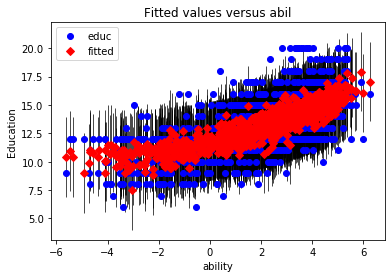

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 3, ax=ax)
ax.set_ylabel("Education")
ax.set_xlabel("ability")
plt.show()

C10.i The men have a higher level of education (on average) than their parents

C10.ii The coefficient on motheduc is the effect of another year of a mother's education on the child's education (with the father's educaiton taken into account)

C10.iii Ability almost doubles the explained variation and so helps to explain variations in education (as measured by R-squared or adjusted R-squared). It is also highly significant

C10.iv -3.96739 will minimize educ (2nd derivative is positive)